# Flooding module

Niche Vlaanderen also contains a module to model the influence of flooding more precisely. This is done using the [Flooding](lowlevel.rst#flooding) class. 

The first step is importing the `niche_vlaanderen` module. For convenience, we will be importing as `nv`.

In [1]:
import niche_vlaanderen as nv
%matplotlib inline
import matplotlib.pyplot as plt

## Creating  a Flooding model
Here the [Flooding](lowlevel.rst#flooding) class is created. Like in Niche Vlaanderen, when creating the class, the model with its codetables is initialized.

In [2]:
fp = nv.Flooding()

## Running the model

The [calculate](lowlevel.rst#niche_vlaanderen.Flooding.calculate) method of the class takes four arguments: the depths (as grid), frequency, period and duration.

In [3]:
fp.calculate(depth_file="../testcase/flooding/ff_bt_t10_h_0.asc",
             frequency="T10", period="summer", duration=1)

/home/runner/.local/lib/python3.10/site-packages/niche_vlaanderen/flooding.py:112: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for veg_code, subtable_veg in self._ct["lnk_potential"].groupby(["veg_code"]):


## Inspecting the model
The results can be plotted per vegetation type. Note that [not all vegetation types of Niche are supported](overstroming.rst#Vegetatietypen) by the flooding module.

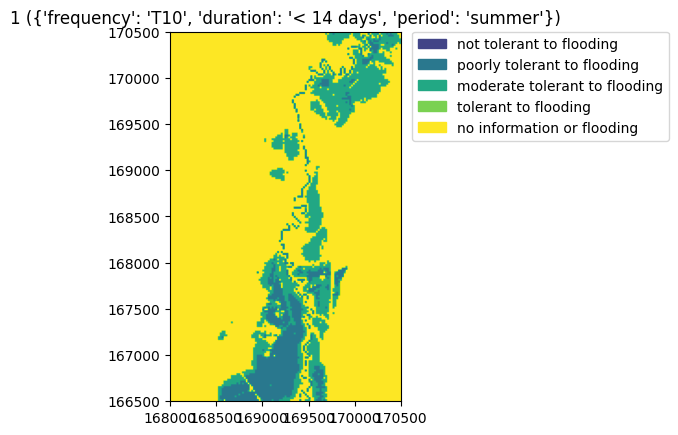

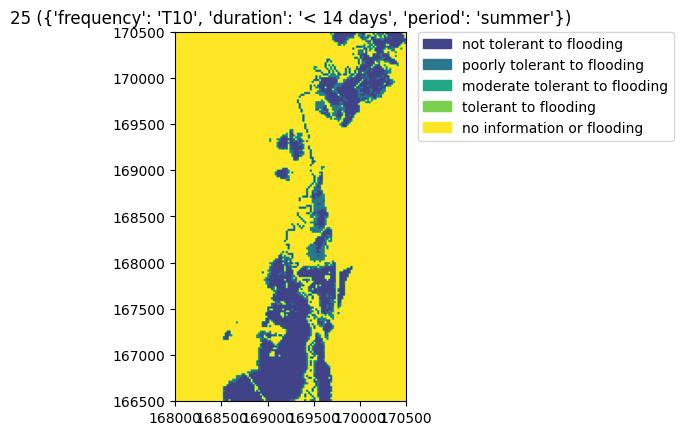

In [4]:
fp.plot(1)
fp.plot(25)

plt.show()

Like for the niche model, it is also possible to generate a summary table.

In [5]:
fp.table.head()

,vegetation,presence_code,presence,area_ha
0,1,4,no information or flooding,821.36
1,1,2,moderate tolerant to flooding,110.92
2,1,1,poorly tolerant to flooding,67.72
3,2,4,no information or flooding,821.36
4,2,2,moderate tolerant to flooding,110.92


## Saving the model
Comparable to the niche model, the resulting grids can be saved using the [write](lowlevel.rst#niche_vlaanderen.Flooding.write) method.

In [6]:
fp.write("_output", overwrite_files=True)

## Combining the output with niche

The output of a Flooding model can be combined with a Niche model, by using the [combine](lowlevel.rst#niche_vlaanderen.Flooding.combine) method. 

We will create a new niche model and set the inputs.

In [7]:
myniche = nv.Niche()
input = "../testcase/dijle/"
myniche.set_input("soil_code", input +"bodemv.asc")
myniche.set_input("msw", input +"gvg_0_cm.asc")
myniche.set_input("mlw", input +"glg_0_cm.asc")
myniche.set_input("mhw", input +"ghg_0_cm.asc")
myniche.set_input("seepage", input +"kwel_mm_dag.asc")
 
myniche.set_input("management", input +"beheer_int.asc")

 
myniche.set_input("nitrogen_atmospheric", input +"depositie_def.asc")
myniche.set_input("nitrogen_animal", input +"bemest_dier.asc")
myniche.set_input("nitrogen_fertilizer", input +"bemest_kunst.asc")

myniche.set_input("inundation_vegetation", input +"overstr_veg.asc")
myniche.set_input("inundation_acidity", input +"ovrstr_t10_50.asc")
myniche.set_input("inundation_nutrient", input +"ovrstr_t10_50.asc")
 
myniche.set_input("minerality", input + "minerality.asc")
 
myniche.set_input("rainwater", input +"nulgrid.asc")

Note that the niche model must be run prior to combining - otherwise this will raise an error.

In this example we also plot the result to allow comparison with the combined map.

/home/runner/.local/lib/python3.10/site-packages/niche_vlaanderen/codetables.py:26: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for sel_group, subtable in df.groupby(list(group_cols)):
/home/runner/.local/lib/python3.10/site-packages/niche_vlaanderen/codetables.py:26: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for sel_group, subtable in df.groupby(list(group_cols)):
/home/runner/.local/lib/python3.10/site-packages/niche_vlaanderen/acidity.py:81: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper

/home/runner/.local/lib/python3.10/site-packages/niche_vlaanderen/vegetation.py:218: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for veg_code, subtable in self._ct_vegetation.groupby(["veg_code"]):


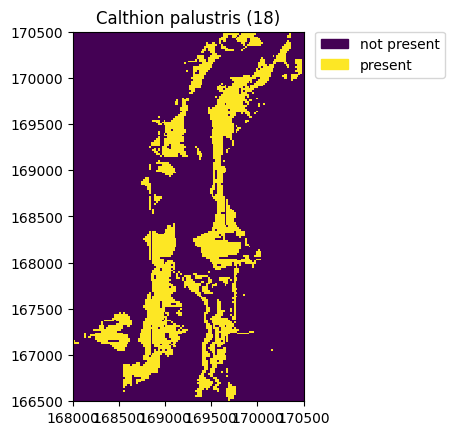

In [8]:
myniche.run()
myniche.plot(18)
plt.show()

Finally, we run the actual [combine](lowlevel.rst#niche_vlaanderen.Flooding.combine) method. The resulting object is a Flooding object, so we can use the same method for plotting the results.

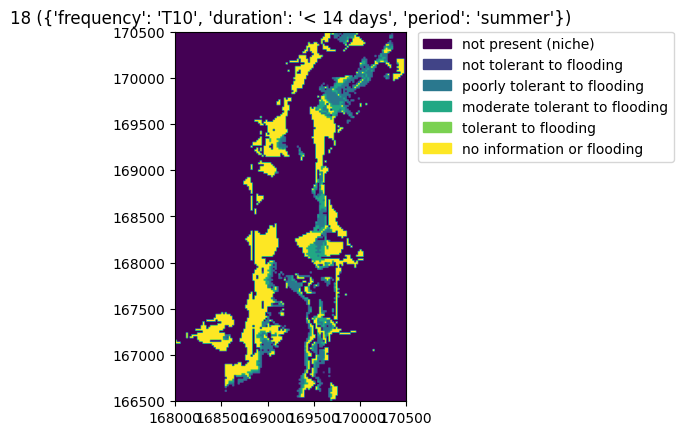

In [9]:
combined = fp.combine(myniche)
combined.plot(18)
plt.show()